<a href="https://colab.research.google.com/github/Masoud19993/project-of-Data-Minig/blob/main/projet__datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall pandas-profiling

Found existing installation: pandas-profiling 3.5.0
Uninstalling pandas-profiling-3.5.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.8/dist-packages/pandas_profiling-3.5.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-3.5.0


# Ce package permet d'obtenir un résumé et un rapport à partir de l'ensemble des données.

pandas-profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is handy yet a little basic for exploratory data analysis. pandas-profiling extends pandas DataFrame with df.profile_report(), which automatically generates a standardized univariate and multivariate report for data understanding.

For each column, the following information (whenever relevant for the column type) is presented in an interactive HTML report:

Type inference: detect the types of columns in a DataFrame

Essentials: type, unique values, indication of missing values

Quantile statistics: minimum value, Q1, median, Q3, maximum, range, interquartile range

Descriptive statistics: mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

Most frequent and extreme values

Histograms: categorical and numerical

Correlations: high correlation warnings, based on different correlation metrics (Spearman, Pearson, Kendall, Cramér’s V, Phik, Auto)

Missing values: through counts, matrix and heatmap

Duplicate rows: list of the most common duplicated rows

Text analysis: most common categories (uppercase, lowercase, separator), scripts (Latin, Cyrillic) and blocks (ASCII, Cyrilic)

File and Image analysis: file sizes, creation dates, dimensions, indication of truncated images and existence of EXIF metadata

The report contains three additional sections:

Overview: mostly global details about the dataset (number of records, number of variables, overall missigness and duplicates, memory footprint)

Alerts: a comprehensive and automatic list of potential data quality issues (high correlation, skewness, uniformity, zeros, missing values, constant values, between others)

Reproduction: technical details about the analysis (time, version and configuration)

The package can be used via code but also directly as a CLI utility. The generated interactive report can be consumed and shared as regular HTML or embedded in an interactive way inside Jupyter Notebooks.
From documentation of pandas-profiling.

In [ ]:
!pip install pandas-profiling[notebook,html]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.5.0-py2.py3-none-any.whl (325 kB)


In [ ]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.2 From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).
From www.kaggle.com
https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [ ]:
df.shape

(768, 9)

# Cette dataset a 768 lignes et chaque donnée a 9 caractéristiques.
# Cette dataset contient les colonnes suivantes

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


La cellule du haut donne un résumé de l'ensemble de données, mais la cellule suivante le décrit en détail.

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Notre ensemble de données est relativement propre et sur les 9 variables dont nous disposons, 8 d'entre elles sont numériques et nous avons une variable catégorique. Nous n'avons pas de cellules manquantes et nous n'avons pas non plus de données en double.
Dans notre variable "Grossesses", il y a 17 valeurs distinctes, soit 2,2% du nombre total de 786, et nous avons 111 zéros, selon les données maximales et minimales et moyennes, nous avons une variance acceptable.
Dans la variable Glucose, nous avons 138 valeurs distinctes, soit 17,7 % de 768, et le nombre de zéros est petit, et compte tenu du maximum, du minimum et de la moyenne, nous avons une bonne variance.
Et nous pouvons également voir les mêmes informations pour d'autres variables.
Nous avons une colonne de résultat qui contient deux classes que nous pouvons utiliser pour évaluer le résultat du clustering.
Nous pouvons voir le graphique d'interaction de chaque paire de variables et en tirer des informations utiles.

Dans le diagramme de la matrice de corrélation, nous pouvons voir que certaines variables ont une forte corrélation, comme l'"âge" et la "grossesse", ou l'épaisseur de la peau et l'insuline.
Nous supposons que nous pouvons réduire les dimensions de l'ensemble de données avec des méthodes de réduction de dimension sans perdre beaucoup d'informations.
En fait, en raison du manque de données catégorielles, il n'est pas possible de trouver un modèle fréquent dans cet ensemble de données.
De plus, pour analyser les données à l'aide de méthodes de graphes, chaque donnée doit être convertie en vecteur et nécessite des connaissances spécialisées.


In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
import numpy as np
def evaluate_clustering(method, data, true_labels):
  predicted_labels = method.fit_predict(data)
  number_of_clusters = len(np.unique(predicted_labels, return_counts=True)[1])
  homogeneity, completeness, v_measure = homogeneity_score(true_labels, predicted_labels), completeness_score(true_labels, predicted_labels), v_measure_score(true_labels, predicted_labels)
  return homogeneity, completeness, v_measure, number_of_clusters

Puisque nous avons Outcom, nous pouvons bien l'utiliser pour évaluer le résultat du clustering.

# Homogeneity_score
Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

# completeness_score
Compute completeness metric of a cluster labeling given a ground truth.

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

# V-measure-score
V-measure cluster labeling given a ground truth.
This score is identical to normalized_mutual_info_score with the 'arithmetic' option for averaging.
The V-measure is the harmonic mean between homogeneity and completeness.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching label_true with label_pred will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

from https://scikit-learn.org/stable/

In [ ]:
true_labels = df['Outcome']
data = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

Nous considérons la colonne "Outcom" comme Grand Trust, et la séparons

Comme le nombre de nos classes est certain et égal à deux, nous appliquons par conséquent l'algorithme DBScan avec des epsilons différents afin d'avoir des résultats incluant deux clusters.

In [ ]:
from sklearn.cluster import DBSCAN
def evaluate_dbscan_on_data(x, true_y):
  epsilons = np.linspace(start=0, stop=1)
  methods = [DBSCAN(eps=epsilon) for epsilon in epsilons[1:]]
  for method in methods:
    homogeneity, completeness, v_measure, number_of_clusters = evaluate_clustering(method, x, true_y)
    print(f"Clustering Method: {method.__class__.__name__}\t Number of Clusters: {number_of_clusters}\t epsilon: {method.eps} \n Homogenity: {homogeneity} \n Completeness: {completeness} \n v_measure: {v_measure}")

In [ ]:
from sklearn.cluster import KMeans
v_measure_kmeans = []
def evaluate_kmeans_on_data(x, true_y):
  method = KMeans(n_clusters=2)
  homogeneity, completeness, v_measure, number_of_clusters = evaluate_clustering(method, x, true_y)
  v_measure_kmeans.append(v_measure)
  print(f"Clustering Method: {method.__class__.__name__} \n Homogenity: {homogeneity} \n Completeness: {completeness} \n v_measure: {v_measure}")

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
v_measure_bgm = []
def evaluate_gm_on_data(x, true_y):
  method = BayesianGaussianMixture(n_components=2)
  homogeneity, completeness, v_measure, number_of_clusters = evaluate_clustering(method, x, true_y)
  v_measure_bgm.append(v_measure)
  print(f"Clustering Method: {method.__class__.__name__} \n Homogenity: {homogeneity} \n Completeness: {completeness} \n v_measure: {v_measure}")

Pour chacun des trois algorithmes dbscan, kmeans et BayesianGaussianMixture, nous avons défini une fonction.
Et puis on met les trois en une seule fonction car on va l'utiliser plusieurs fois.

In [ ]:
def evaluate_clusterings_on_data(x, true_y):
  evaluate_dbscan_on_data(x, true_y)
  evaluate_kmeans_on_data(x, true_y)
  evaluate_gm_on_data(x, true_y)

# Tout d'abord, nous effectuons un clustering sans aucun prétraitement.

In [ ]:
evaluate_clusterings_on_data(data, true_labels)

Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.02040816326530612 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.04081632653061224 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.061224489795918366 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.08163265306122448 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.1020408163265306 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.12244897959183673 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.14285714285714285 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.1

On peut voir que le nombre de clusters souhaité ne peut pas être obtenu avec l'algorithme dbscan sans normaliser les données.
DBScan résultats valent mieux que BayesianGaussianMixture, bien qu'aucun d'entre eux ne soit intéressant.

# Results after normalization:

In [ ]:
from sklearn.preprocessing import StandardScaler
normalized_data= StandardScaler().fit_transform(data)

In [ ]:
evaluate_clusterings_on_data(normalized_data, true_labels)

Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.02040816326530612 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.04081632653061224 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.061224489795918366 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.08163265306122448 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.1020408163265306 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.12244897959183673 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.14285714285714285 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.1

On peut voir qu'après normalisation des données, nous pouvons obtenir deux clusters à partir de l'algorithme dbscan. Mais nous n'avons toujours pas une grande précision.
On peut également voir que les résultats de DBScan et BayesianGaussianMixture se sont améliorés.

# Results after dimension reduction

In [ ]:
from sklearn.decomposition import PCA
number_of_components = range(8, 1, -1)
v_measure_kmeans = []
v_measure_bgm = []
for nc in number_of_components:
  pca = PCA(n_components=nc)
  data_pca = pd.DataFrame(pca.fit_transform(normalized_data))
  print("!"*100)
  print(f"number of components: {nc}")
  evaluate_clusterings_on_data(data_pca, true_labels)
  print("!"*100)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
number of components: 8
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.02040816326530612 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.04081632653061224 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.061224489795918366 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.08163265306122448 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.1020408163265306 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.12244897959183673 
 Homogenity: 0.0 
 Completeness: 1.0 
 v_measure: 0.0
Clustering Method: DBSCAN	 Number of Clusters: 1	 epsilon: 0.1428571428

On peut voir que l'algorithme dbscan n'est pas un algorithme approprié pour cet ensemble de données.
Ensuite, nous dessinons la précision des résultats pour les algorithmes dbscan et BGM.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


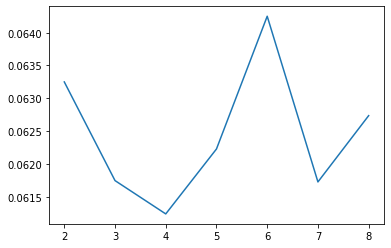

In [ ]:
sns.lineplot(number_of_components, v_measure_kmeans)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


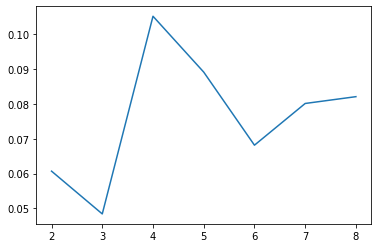

In [ ]:
sns.lineplot(number_of_components, v_measure_bgm)

# Data visualization on 2D

In [ ]:
pca = PCA(n_components=2)
data_pca = pd.DataFrame(pca.fit_transform(normalized_data))

In [ ]:
kmean = KMeans(n_clusters=2)
cluster = kmean.fit_predict(data_pca)

# Dessiner un graphique des résultats réels et des résultats prévus et les comparer

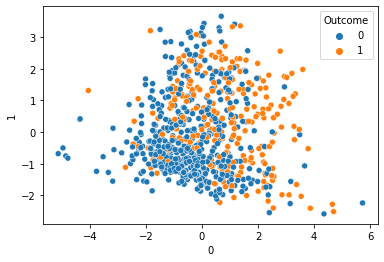

In [ ]:
sns.scatterplot(data=data_pca, x=data_pca[0], y=data_pca[1], hue=true_labels)

En regardant le diagramme, nous pouvons voir que les méthodes de clustering que nous avons utilisées ne seront pas très efficaces

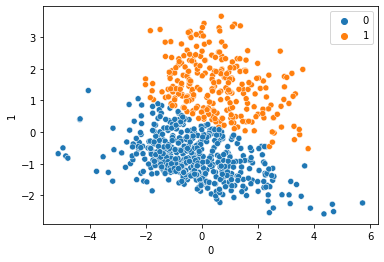

In [ ]:
sns.scatterplot(data=data_pca, x=data_pca[0], y=data_pca[1], hue=cluster)

En résumé, on peut dire que les méthodes ci-dessus ne sont pas très optimales pour clustering cet ensemble de données.
Peut-être que nos données ne sont pas complètes, par exemple, il y a d'autres paramètres qui ont un plus grand impact sur le résultat du clustering, mais nous ne les avons pas mesurés, ce qui signifie qu'en augmentant les dimensions de l'ensemble de données, un meilleur résultat peut être obtenu .
De plus, il peut être possible de créer une nouvelle dimension à partir des résultats obtenus à partir des K-means et de l'utiliser dans l'algorithme de la machine à vecteurs de support.